# INSTALL LIBRARY

In [ ]:
!pip install googletrans==3.1.0a0
!pip install swifter
!pip install vaderSentiment

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 8.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.3 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16352 sha256=73194e4885f462e78fb0db0bd0b49a81191ea9aa9f726938299b87dbc8a10d0e
  Stored in directory: /root/.cache/pip/wheels/50/5d/3c/8477d0af4ca2b8b1308812c09f1930863caeebc762fe265a95
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling char

# IMPORT LIBRARY

In [ ]:
# IMPORT LIBRARY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#library untuk support library pandas (mempercepat waktu proses)
import swifter

#library untuk translete dataset
from googletrans import Translator

# library untuk pemrosesan dan analisis teks
import string
import re #Regex library = untuk melakukan search data
import nltk #nltk library = untuk memproses teks
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

# library vadersentiment untuk pelabelan data otomatis
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

#library untuk melakukan tf-idf
from sklearn.feature_extraction.text import TfidfVectorizer

#library untuk melakukan pembagian data training dan test
from sklearn.model_selection import train_test_split

#library Naive Bayes multinomial
from sklearn.naive_bayes import MultinomialNB

#library random forest
from sklearn.ensemble import RandomForestClassifier

# Library Akurasi
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#library untuk visualisasi dengan wordcloud
from wordcloud import WordCloud

#mengunduh kata tidak memiliki makna penting dan punkt
nltk.download('punkt')
nltk.download('stopwords')
print(stopwords.words('english'))


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv('dataset_gplayID.csv') # Membaca atau import dataset dengan ekstensi .csv
df.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,94b84820-c91e-4fad-889a-69380900b25a,Agidah,https://play-lh.googleusercontent.com/a-/ACB-R...,Pantes harga murah sih. Kualitasnya kurang. Ti...,2,303,3.15.1,2023-04-26 10:31:30,"Kami mohon maaf atas yang terjadi kepada anda,...",2023-04-26 11:27:07,3.15.1
1,90f0424f-4534-4bb8-8f93-68386f24f4e3,dewi sutiningrat,https://play-lh.googleusercontent.com/a/AGNmyx...,"Ini kenapa sih app nya, setiap mau buka tulisa...",1,612,3.15.1,2023-04-26 16:28:02,NaN,NaN,3.15.1
2,7bee0539-85c4-4344-ae81-2b433c35aafb,annnd rianii,https://play-lh.googleusercontent.com/a-/ACB-R...,Bintang sy kurangi. Sy gag bs pakai aplikasi s...,1,643,3.15.1,2023-04-25 11:00:22,"Kami mohon maaf atas masalah ini, silakan samp...",2022-10-31 08:09:29,3.15.1
3,7ee80d7b-84e7-4381-9cff-8052431b7d30,Adi Graha jasa angkut jogja,https://play-lh.googleusercontent.com/a-/ACB-R...,"Perbaiki map nya & diperbaharui, titik banyak ...",1,15,3.15.1,2023-04-29 08:25:36,NaN,NaN,3.15.1
4,f763be02-1651-4e7f-a650-60f752cf999d,Vessantara Dhi “Raka Dharma”,https://play-lh.googleusercontent.com/a-/ACB-R...,"Pilihan Tempat di map belum lengkap, lalu pemb...",2,338,3.15.0,2023-04-12 07:26:07,"Saran dan masukkan Anda sangat berarti, kami a...",2023-04-12 09:49:27,3.15.0


In [ ]:
#Cek Tahun Hasil Penarikan Dataset

#mengubah kolom / atribut tanggal menjadi tipedata datetime
df['Tanggal'] = pd.to_datetime(df['at'])

# Tanggal pertama
tanggal_mulai = df['Tanggal'].min().date()

# Tanggal terakhir
tanggal_selesai = df['Tanggal'].max().date()

print("Data dimulai pada:", tanggal_mulai)
print("Data berakhir pada:", tanggal_selesai)

Data dimulai pada: 2018-09-15
Data berakhir pada: 2023-05-03


In [ ]:
df.info() #cek berapa jumlah data pada dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              50000 non-null  object        
 1   userName              50000 non-null  object        
 2   userImage             50000 non-null  object        
 3   content               50000 non-null  object        
 4   score                 50000 non-null  int64         
 5   thumbsUpCount         50000 non-null  int64         
 6   reviewCreatedVersion  44728 non-null  object        
 7   at                    50000 non-null  object        
 8   replyContent          17155 non-null  object        
 9   repliedAt             17155 non-null  object        
 10  appVersion            44728 non-null  object        
 11  Tanggal               50000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(9)
memory usage: 4.6+ MB


# **PREPROCESSING**

## TRANSLETE DATASET

In [ ]:
translator = Translator()
df.loc[:,'content'] = df['content'].apply(lambda x: translator.translate(x, src='id', dest='en').text)
df.to_csv('dataset_gplayTRNSLTE.csv', index=False)

In [ ]:
df.head(3)

## CLEANING DATA

In [ ]:
df = pd.read_csv('dataset_gplayTRNSLTE.csv')
df.head(3)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,94b84820-c91e-4fad-889a-69380900b25a,Agidah,https://play-lh.googleusercontent.com/a-/ACB-R...,No wonder the price is cheap. The quality is l...,2,303,3.15.1,2023-04-26 10:31:30,"Kami mohon maaf atas yang terjadi kepada anda,...",2023-04-26 11:27:07,3.15.1
1,90f0424f-4534-4bb8-8f93-68386f24f4e3,dewi sutiningrat,https://play-lh.googleusercontent.com/a/AGNmyx...,"Why is this app, every time I open it it says ...",1,612,3.15.1,2023-04-26 16:28:02,NaN,NaN,3.15.1
2,7bee0539-85c4-4344-ae81-2b433c35aafb,annnd rianii,https://play-lh.googleusercontent.com/a-/ACB-R...,My star is reduced. I can't use the applicatio...,1,643,3.15.1,2023-04-25 11:00:22,"Kami mohon maaf atas masalah ini, silakan samp...",2022-10-31 08:09:29,3.15.1


In [ ]:
#menghapus kolom yang tidak diperlukan
df = df.drop(['userImage', 'score', 'thumbsUpCount', 'reviewCreatedVersion', 'replyContent', 'repliedAt','appVersion'], axis=1)
df.head(5)

,reviewId,userName,content,at
0,94b84820-c91e-4fad-889a-69380900b25a,Agidah,No wonder the price is cheap. The quality is l...,2023-04-26 10:31:30
1,90f0424f-4534-4bb8-8f93-68386f24f4e3,dewi sutiningrat,"Why is this app, every time I open it it says ...",2023-04-26 16:28:02
2,7bee0539-85c4-4344-ae81-2b433c35aafb,annnd rianii,My star is reduced. I can't use the applicatio...,2023-04-25 11:00:22
3,7ee80d7b-84e7-4381-9cff-8052431b7d30,Adi Graha jasa angkut jogja,"Fix the map & update it, many points miss it's...",2023-04-29 08:25:36
4,f763be02-1651-4e7f-a650-60f752cf999d,Vessantara Dhi “Raka Dharma”,"The choice of place on the map isn't complete,...",2023-04-12 07:26:07


In [ ]:
# Untuk Mengecek apakah ada data yang kosong / NaN pada dataset
df.isnull().any()
# jika hasil TRUE = ada data NaN / NULL. jika FALSE maka sebaliknya

reviewId    False
userName    False
content     False
at          False
dtype: bool

In [ ]:
# untuk membuat duplikasi kolom dan cek kolom sudah terbuat atau belum
df['cleaningdata'] = df['content']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewId      50000 non-null  object
 1   userName      50000 non-null  object
 2   content       50000 non-null  object
 3   at            50000 non-null  object
 4   cleaningdata  50000 non-null  object
dtypes: object(5)
memory usage: 1.9+ MB


In [ ]:
df.drop_duplicates(subset=['reviewId'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewId      50000 non-null  object
 1   userName      50000 non-null  object
 2   content       50000 non-null  object
 3   at            50000 non-null  object
 4   cleaningdata  50000 non-null  object
dtypes: object(5)
memory usage: 2.3+ MB


In [ ]:
def remove_content_special(text):
  #Menghapus Tab, new line, dan back slice
  text = text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
  # Menghapus karakter non-ASCII (emoticon, chinese word, .etc)
  text = text.encode('ascii', 'replace').decode('ascii')
  #Menghapus mention, link, dan hashtag
  text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
  #Menghapus URL yang tidak lengkap
  text = text.replace("http://", " ").replace("https://", " ")
  #Menghapus Angka
  text = re.sub(r"\d+", "", text)
  #Remove Punctuation untuk menghilangkan tanda baca seperti koma dan titik
  text = text.translate(str.maketrans("","",string.punctuation))
  #Remove whitespace pada awalan dan akhiran
  text = text.strip()
  #Mengganti multiple whitespace menjadi satu spasi
  text = re.sub('\s+',' ',text)

  return text

df['cleaningdata'] = df['cleaningdata'].apply(remove_content_special)

df[['content','cleaningdata']].head()

,content,cleaningdata
0,No wonder the price is cheap. The quality is l...,No wonder the price is cheap The quality is la...
1,"Why is this app, every time I open it it says ...",Why is this app every time I open it it says t...
2,My star is reduced. I can't use the applicatio...,My star is reduced I cant use the application ...
3,"Fix the map & update it, many points miss it's...",Fix the map update it many points miss its ina...
4,"The choice of place on the map isn't complete,...",The choice of place on the map isnt complete t...


## CASEFOLDING

In [ ]:
# str.lower untuk merubah setiap kalimat menjadi huruf kecil
df['casefolding'] = df['cleaningdata'].str.lower()
df[['content','casefolding']].head()

,content,casefolding
0,No wonder the price is cheap. The quality is l...,no wonder the price is cheap the quality is la...
1,"Why is this app, every time I open it it says ...",why is this app every time i open it it says t...
2,My star is reduced. I can't use the applicatio...,my star is reduced i cant use the application ...
3,"Fix the map & update it, many points miss it's...",fix the map update it many points miss its ina...
4,"The choice of place on the map isn't complete,...",the choice of place on the map isnt complete t...


## TOKENIZING

In [ ]:
# NLTK word rokenize
def word_tokenize_wrapper(text):
    return word_tokenize(text)

df['tokenizing'] = df['casefolding'].apply(word_tokenize_wrapper)

print('Tokenizing Result : \n')
print(df['tokenizing'].head())
print('\n\n\n')

Tokenizing Result : 

0    [no, wonder, the, price, is, cheap, the, quali...
1    [why, is, this, app, every, time, i, open, it,...
2    [my, star, is, reduced, i, cant, use, the, app...
3    [fix, the, map, update, it, many, points, miss...
4    [the, choice, of, place, on, the, map, isnt, c...
Name: tokenizing, dtype: object






In [ ]:
df[['content','tokenizing']].head()

,content,tokenizing
0,No wonder the price is cheap. The quality is l...,"[no, wonder, the, price, is, cheap, the, quali..."
1,"Why is this app, every time I open it it says ...","[why, is, this, app, every, time, i, open, it,..."
2,My star is reduced. I can't use the applicatio...,"[my, star, is, reduced, i, cant, use, the, app..."
3,"Fix the map & update it, many points miss it's...","[fix, the, map, update, it, many, points, miss..."
4,"The choice of place on the map isn't complete,...","[the, choice, of, place, on, the, map, isnt, c..."


## FILTERING (Stopword removal)

In [ ]:
stop_words = set(stopwords.words('english'))

df['filtering'] = df['tokenizing'].apply(lambda x: [word for word in x if word not in stop_words])
df[['content','filtering']].head()

,content,filtering
0,No wonder the price is cheap. The quality is l...,"[wonder, price, cheap, quality, lacking, locat..."
1,"Why is this app, every time I open it it says ...","[app, every, time, open, says, source, crashed..."
2,My star is reduced. I can't use the applicatio...,"[star, reduced, cant, use, application, upgrad..."
3,"Fix the map & update it, many points miss it's...","[fix, map, update, many, points, miss, inaccur..."
4,"The choice of place on the map isn't complete,...","[choice, place, map, isnt, complete, payment, ..."


## STEMMING

In [ ]:
# create stemmer
stemmer = SnowballStemmer("english")

term_dict = {}

for document in df['filtering']:
    for term in document:
        if term not in term_dict:
            term_dict[term] = ' '

print(len(term_dict))
print("------------------------")

for term in term_dict:
    term_dict[term] = stemmer.stem(term)
    print(term,":" ,term_dict[term])

print(len(term_dict))
print("------------------------")
print(term_dict)
print("------------------------")


# apply stemmed term to dataframe
def get_stemmed_term(document):
    return [term_dict[term] for term in document]

df['stemming'] = df['filtering'].apply(get_stemmed_term)

Output streaming akan dipotong hingga 5000 baris terakhir.
standardization : standard
driverhmmm : driverhmmm
powerful : power
bangke : bangk
applicationcan : applicationcan
minutesfucek : minutesfucek
spacememory : spacememori
cscustomers : cscustom
hardest : hardest
aojol : aojol
drying : dri
stunning : stun
transformations : transform
mantaf : mantaf
monitoring : monitor
communicator : communic
hasim : hasim
ktly : ktli
errorbr : errorbr
ajg : ajg
againthank : againthank
alfi : alfi
nowkeep : nowkeep
fb : fb
yougreat : yougreat
mate : mate
waynever : waynev
greatif : greatif
locationmake : locationmak
farcheap : farcheap
economicalmaxim : economicalmaxim
gokil : gokil
manado : manado
bargains : bargain
perkilo : perkilo
khan : khan
entrepreneurs : entrepreneur
disappoints : disappoint
nhas : nhas
atms : atm
appraiser : apprais
digituin : digituin
callsms : callsm
naroh : naroh
endlessly : endless
fled : fled
friendlynot : friendlynot
waitcarries : waitcarri
maximit : maximit
innocen

In [ ]:
df[['content','stemming']].head()

,content,stemming
0,No wonder the price is cheap. The quality is l...,"[wonder, price, cheap, qualiti, lack, locat, p..."
1,"Why is this app, every time I open it it says ...","[app, everi, time, open, say, sourc, crash, iv..."
2,My star is reduced. I can't use the applicatio...,"[star, reduc, cant, use, applic, upgrad, everi..."
3,"Fix the map & update it, many points miss it's...","[fix, map, updat, mani, point, miss, inaccur, ..."
4,"The choice of place on the map isn't complete,...","[choic, place, map, isnt, complet, payment, bi..."


In [ ]:
df.head()

,reviewId,userName,content,at,cleaningdata,casefolding,tokenizing,filtering,stemming
0,94b84820-c91e-4fad-889a-69380900b25a,Agidah,No wonder the price is cheap. The quality is l...,2023-04-26 10:31:30,No wonder the price is cheap The quality is la...,no wonder the price is cheap the quality is la...,"[no, wonder, the, price, is, cheap, the, quali...","[wonder, price, cheap, quality, lacking, locat...","[wonder, price, cheap, qualiti, lack, locat, p..."
1,90f0424f-4534-4bb8-8f93-68386f24f4e3,dewi sutiningrat,"Why is this app, every time I open it it says ...",2023-04-26 16:28:02,Why is this app every time I open it it says t...,why is this app every time i open it it says t...,"[why, is, this, app, every, time, i, open, it,...","[app, every, time, open, says, source, crashed...","[app, everi, time, open, say, sourc, crash, iv..."
2,7bee0539-85c4-4344-ae81-2b433c35aafb,annnd rianii,My star is reduced. I can't use the applicatio...,2023-04-25 11:00:22,My star is reduced I cant use the application ...,my star is reduced i cant use the application ...,"[my, star, is, reduced, i, cant, use, the, app...","[star, reduced, cant, use, application, upgrad...","[star, reduc, cant, use, applic, upgrad, everi..."
3,7ee80d7b-84e7-4381-9cff-8052431b7d30,Adi Graha jasa angkut jogja,"Fix the map & update it, many points miss it's...",2023-04-29 08:25:36,Fix the map update it many points miss its ina...,fix the map update it many points miss its ina...,"[fix, the, map, update, it, many, points, miss...","[fix, map, update, many, points, miss, inaccur...","[fix, map, updat, mani, point, miss, inaccur, ..."
4,f763be02-1651-4e7f-a650-60f752cf999d,Vessantara Dhi “Raka Dharma”,"The choice of place on the map isn't complete,...",2023-04-12 07:26:07,The choice of place on the map isnt complete t...,the choice of place on the map isnt complete t...,"[the, choice, of, place, on, the, map, isnt, c...","[choice, place, map, isnt, complete, payment, ...","[choic, place, map, isnt, complet, payment, bi..."


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   reviewId      50000 non-null  object
 1   userName      50000 non-null  object
 2   content       50000 non-null  object
 3   at            50000 non-null  object
 4   cleaningdata  50000 non-null  object
 5   casefolding   50000 non-null  object
 6   tokenizing    50000 non-null  object
 7   filtering     50000 non-null  object
 8   stemming      50000 non-null  object
dtypes: object(9)
memory usage: 3.4+ MB


In [ ]:
df.to_csv("dataset_gplayHASIL.csv")

# **pelabelan data**

In [ ]:
df = pd.read_csv("dataset_gplayHASIL.csv")
analyser = SentimentIntensityAnalyzer()

# function to calculate vader sentiment
scores = [analyser.polarity_scores(x) for x in df['stemming']]
print(scores)
df['compound_scores'] = [x['compound'] for x in scores]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
df[['stemming','compound_scores']].head()

,stemming,compound_scores
0,"['wonder', 'price', 'cheap', 'qualiti', 'lack'...",-0.0000
1,"['app', 'everi', 'time', 'open', 'say', 'sourc...",-0.4314
2,"['star', 'reduc', 'cant', 'use', 'applic', 'up...",0.6369
3,"['fix', 'map', 'updat', 'mani', 'point', 'miss...",0.3278
4,"['choic', 'place', 'map', 'isnt', 'complet', '...",0.3173


In [ ]:
# Membuat fungsi untuk mengubah nilai menjadi 3 label
def label_sentiment(score):
    if score <= -0.05:
        return 'negatif'
    elif score >= 0.05:
        return 'positif'
    else:
        return 'netral'

# Menerapkan fungsi pada kolom "compound_scores" untuk membuat kolom baru "sentiment"
df['sentiment'] = df['compound_scores'].apply(label_sentiment)

In [ ]:
df[['stemming','compound_scores','sentiment']].head()

,stemming,compound_scores,sentiment
0,"['wonder', 'price', 'cheap', 'qualiti', 'lack'...",-0.0000,netral
1,"['app', 'everi', 'time', 'open', 'say', 'sourc...",-0.4314,negatif
2,"['star', 'reduc', 'cant', 'use', 'applic', 'up...",0.6369,positif
3,"['fix', 'map', 'updat', 'mani', 'point', 'miss...",0.3278,positif
4,"['choic', 'place', 'map', 'isnt', 'complet', '...",0.3173,positif


In [ ]:
#menghitung jumlah sentimen
pos_label = df.loc[df['sentiment'] == 'positif'].shape[0]
neg_label  = df.loc[df['sentiment'] == 'negatif'].shape[0]
net_label = df.loc[df['sentiment'] == 'netral'].shape[0]

# Menghitung persentase
total_data = len(df)
pos_percentase = (pos_label / total_data) * 100
neg_percentase = (neg_label / total_data) * 100
neu_percentase = (net_label / total_data) * 100

# Menampilkan hasil
print("Persentase Label Sentiment:")
print(f"Positif: {pos_label} data {pos_percentase:.2f}%")
print(f"Negatif: {neg_label} data {neg_percentase:.2f}%")
print(f"Netral: {net_label} data {neu_percentase:.2f}%")

Persentase Label Sentiment:
Positif: 31934 data 63.87%
Negatif: 7912 data 15.82%
Netral: 10154 data 20.31%


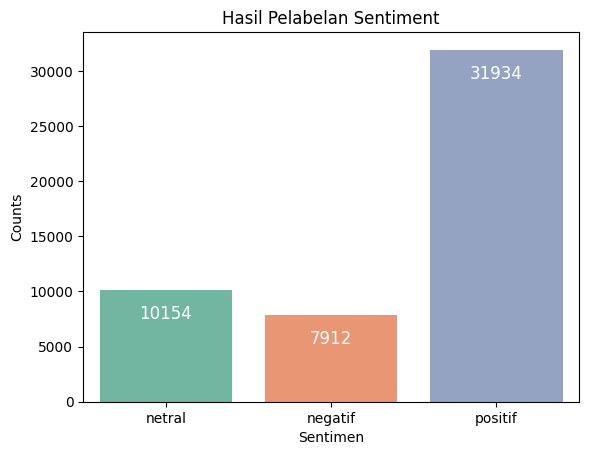

In [ ]:
# Visualisasi Count Plot ( untuk menampilkan frekuensi masing-masing kategori dalam
# variabel kategorikal dalam bentuk bar chart) dengan Seaborn
count_data = sns.countplot(x='sentiment', data=df, palette = "Set2")

#memasukkan teks / angka pada tiap diagram
for p in count_data.patches:
    count_data.annotate(f'\n{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                        ha='center', va='center', fontsize=12, color='white', xytext=(0,-10), textcoords='offset points')


# Menambahkan judul dan label sumbu
plt.title('Hasil Pelabelan Sentiment')
plt.xlabel('Sentimen')
plt.ylabel('Counts')

# Menampilkan grafik
plt.show()

In [ ]:
df.to_csv("dataset_gplayLABEL_VADER.csv")

# PEMBAGIAN DATA TRAINING DAN DATA TEST

In [ ]:
df = pd.read_csv("dataset_gplayLABEL_VADER.csv")

In [ ]:
# Bagi data menjadi data training 80% dan data test 20%
x_train, x_test, y_train, y_test = train_test_split(df["stemming"], df["sentiment"], test_size=0.2, random_state=42)

In [ ]:
# Menampilkan jumlah data train dan test pada kelas x dan y
print("Size of x_train: ", (x_train.shape))
print("Size of y_train: ", (y_train.shape))
print("Size of x_test: ", (x_test.shape))
print("Size of y_test: ", (y_test.shape))

Size of x_train:  (40000,)
Size of y_train:  (40000,)
Size of x_test:  (10000,)
Size of y_test:  (10000,)


# **TF-IDF**

In [ ]:
#menggunakan TF-IDF
vector = TfidfVectorizer()
X_train_tfidf = vector.fit_transform(x_train)
X_test_tfidf = vector.transform(x_test)

# **NAIVE BAYES MULTINOMIAL**

In [ ]:
# Proses Pelatihan untuk Model Naive Bayes
# Untuk Model Naive Bayes menggunakan rumus Multinomial

naivebayes = MultinomialNB()
naivebayes.fit(X_train_tfidf,y_train)

MultinomialNB()

In [ ]:
#note : menggunakan tf-idf -> pembagian data training & test -> model : 75.66% akurasi

# Proses Pengujian Model Naive Bayes
nb_pred = naivebayes.predict(X_test_tfidf)
nb_acc = accuracy_score(nb_pred, y_test)*100
print(f"Test Accuracy: {nb_acc}%")

Test Accuracy: 75.91%


In [ ]:
#menampilkan hasil akurasi recall presisi dan f1-score
print("HASIL classification report")
print(classification_report(y_test, nb_pred))

#menampilkan hasil akurasi dengan confusion matriX
print("HASIL CONFUSION MATRIX")
confusionNB = confusion_matrix(y_test, nb_pred)
print(confusionNB,"\n")

HASIL classification report
              precision    recall  f1-score   support

     negatif       0.70      0.63      0.66      1591
      netral       0.89      0.26      0.40      2037
     positif       0.76      0.95      0.84      6372

    accuracy                           0.76     10000
   macro avg       0.78      0.61      0.64     10000
weighted avg       0.78      0.76      0.73     10000

HASIL CONFUSION MATRIX
[[1009   36  546]
 [ 147  531 1359]
 [ 290   31 6051]] 



## Visualisasi Naive Bayes

In [ ]:
#menampilkan Hasil Klasifikasi sentimen dengan NAIVE BAYES
prednb = pd.DataFrame() #pembentukan dataframe sementara
prednb['content'] = x_test #untuk digunakan pada visualisasi wordcloud
prednb['sentiment'] = nb_pred #untuk digunakan menghitung label dan PIE CHART


#menghitung jumlah sentimen
pos_labelpie = prednb.loc[prednb['sentiment'] == 'positif'].shape[0]
neg_labelpie  = prednb.loc[prednb['sentiment'] == 'negatif'].shape[0]
net_labelpie = prednb.loc[prednb['sentiment'] == 'netral'].shape[0]

# Menghitung persentase
total_datapie = len(nb_pred)
pos_percentasepie = (pos_labelpie / total_datapie) * 100
neg_percentasepie = (neg_labelpie / total_datapie) * 100
neu_percentasepie = (net_labelpie / total_datapie) * 100

# Menampilkan hasil
print("Persentase Label Sentiment:")
print(f"Positif: {pos_labelpie} data {pos_percentasepie:.2f}%")
print(f"Negatif: {neg_labelpie} data {neg_percentasepie:.2f}%")
print(f"Netral: {net_labelpie} data {neu_percentasepie:.2f}%")

Persentase Label Sentiment:
Positif: 7956 data 79.56%
Negatif: 1446 data 14.46%
Netral: 598 data 5.98%


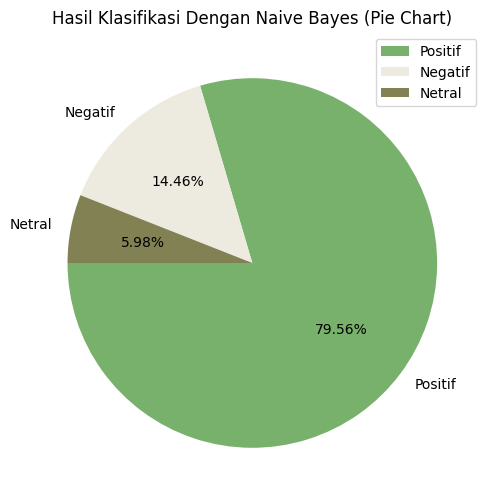

In [ ]:
#PIE CHART
#deklarasi variabel untuk menentukan label dan presentase
labelNB = ['Positif','Negatif','Netral']
presentaseNB = [pos_labelpie, neg_labelpie, net_labelpie]
warnaNB=['#78B16B', '#EDEBE0','#828153']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.title('Hasil Klasifikasi Dengan Naive Bayes (Pie Chart)')
plt.pie(presentaseNB, labels=labelNB,colors=warnaNB, autopct='%.2f%%', startangle=180)
plt.legend()

# Menampilkan pie chart
plt.show()

Text(0.5, 1.0, 'Hasil Confusion Matrix Dari Klasifikasi Dengan Naive Bayes (Heatmap)\n')

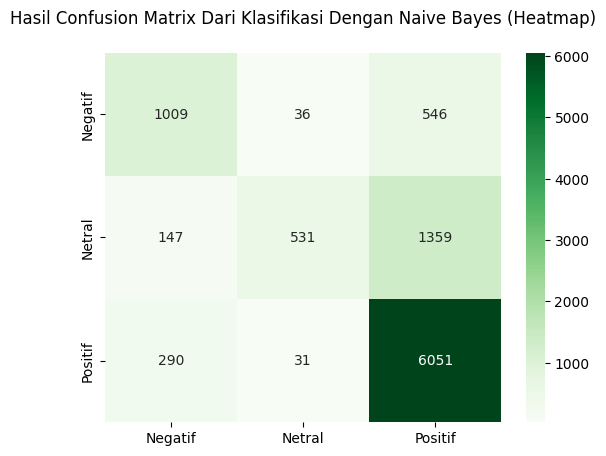

In [ ]:
#HEATMAP
sns.heatmap(confusionNB, annot=True, cmap='Greens', fmt='d', xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title('Hasil Confusion Matrix Dari Klasifikasi Dengan Naive Bayes (Heatmap)\n')

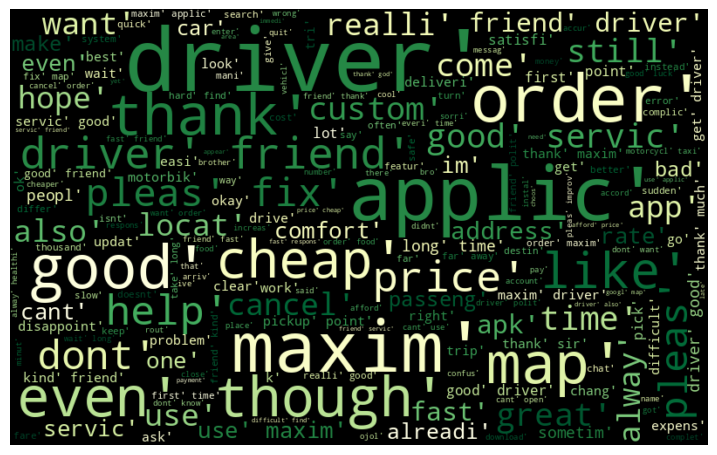

In [ ]:
#WORD CLOUD
# Membuat fungsi untuk menampilkan kata pada wordcloud
def wordcloud_nb(words):
    wordcloudNB = WordCloud(width=800, height=500, colormap='YlGn', background_color='black', random_state=42, max_font_size=100).generate(words)

    plt.figure(figsize=(9, 6))
    plt.imshow(wordcloudNB, interpolation='bilinear')
    plt.axis('off')


# Menampilkan wordcloud
all_wordsNB = ' '.join([text for text in prednb['content']])
wordcloud_nb(all_wordsNB)

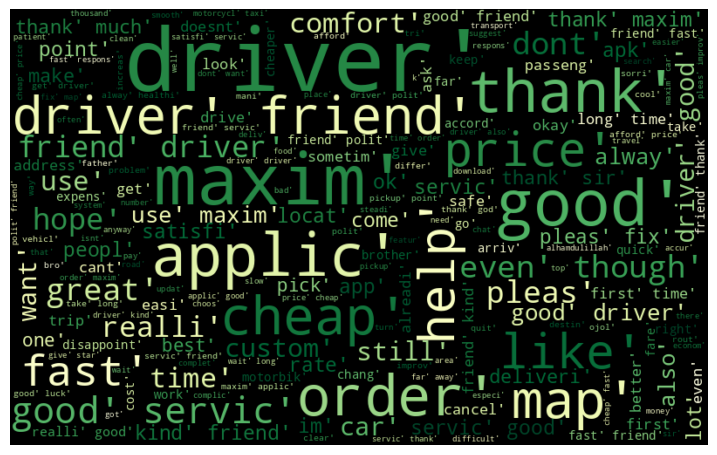

In [ ]:
#Wordcloud Sentiment positif
positif_wordsNB = ' '.join(text for text in prednb['content'][prednb['sentiment'] == 'positif'])
wordcloud_nb(positif_wordsNB)

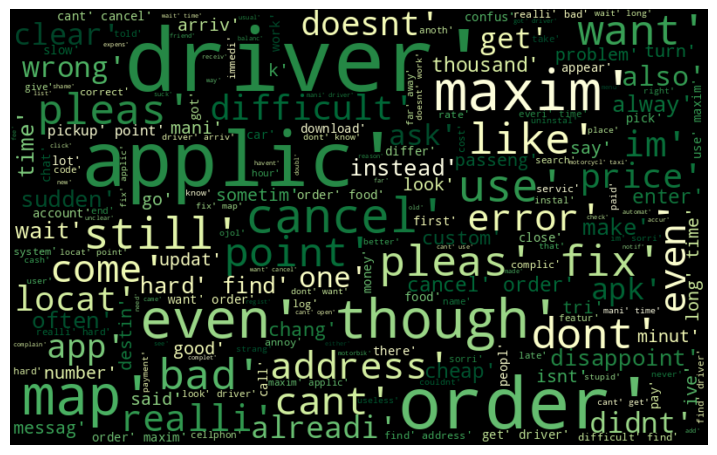

In [ ]:
#Wordcloud Sentiment negatif
negatif_wordsNB = ' '.join(text for text in prednb['content'][prednb['sentiment'] == 'negatif'])
wordcloud_nb(negatif_wordsNB)

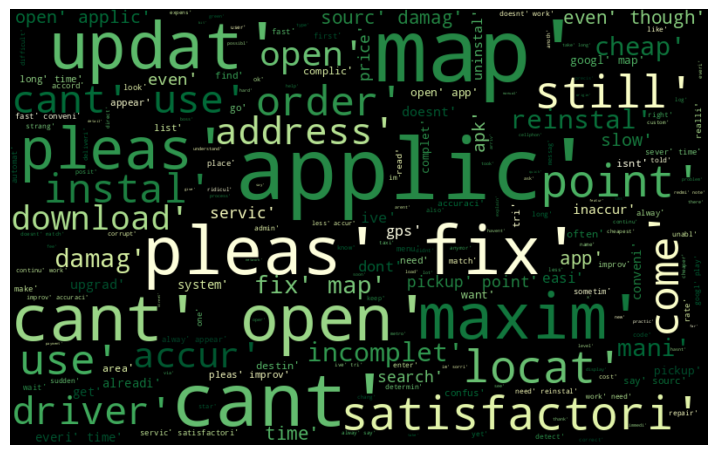

In [ ]:
#Wordcloud Sentiment netral
netral_wordsNB = ' '.join(text for text in prednb['content'][prednb['sentiment'] == 'netral'])
wordcloud_nb(netral_wordsNB)

# **RANDOM FOREST**

In [ ]:
#membuat model untuk random forest dan melatihnya dengan data training
randomforest = RandomForestClassifier()
randomforest.fit(X_train_tfidf,y_train)

RandomForestClassifier()

In [ ]:
# Proses Pengujian Model Random Forest
rf_pred = randomforest.predict(X_test_tfidf)
rf_acc = accuracy_score(rf_pred, y_test)*100
print(f"Test Accuracy: {rf_acc}%")

Test Accuracy: 90.06%


In [ ]:
#menampilkan hasil akurasi recall presisi dan f1-score
print("HASIL classification report")
print(classification_report(y_test, rf_pred))

#menampilkan hasil akurasi  dengan confusion matriX
print("HASIL CONFUSION MATRIX")
confusionRF = confusion_matrix(y_test, rf_pred)
print(confusionRF,"\n")

HASIL classification report
              precision    recall  f1-score   support

     negatif       0.81      0.73      0.76      1591
      netral       0.88      0.89      0.89      2037
     positif       0.93      0.95      0.94      6372

    accuracy                           0.90     10000
   macro avg       0.87      0.85      0.86     10000
weighted avg       0.90      0.90      0.90     10000

HASIL CONFUSION MATRIX
[[1156  115  320]
 [  73 1810  154]
 [ 205  127 6040]] 



## Visualisasi Random Forest

In [ ]:
#menampilkan Hasil Klasifikasi sentimen dengan NAIVE BAYES
predrf = pd.DataFrame() #pembentukan dataframe sementara
predrf['content'] = x_test #untuk digunakan pada visualisasi wordcloud
predrf['sentiment'] = rf_pred #untuk digunakan menghitung label dan PIE CHART

#menghitung jumlah sentimen
pos_labelpierf = predrf.loc[predrf['sentiment'] == 'positif'].shape[0]
neg_labelpierf = predrf.loc[predrf['sentiment'] == 'negatif'].shape[0]
net_labelpierf = predrf.loc[predrf['sentiment'] == 'netral'].shape[0]

# Menghitung persentase
total_datapierf = len(rf_pred)
pos_percentasepierf = (pos_labelpierf / total_datapierf) * 100
neg_percentasepierf = (neg_labelpierf / total_datapierf) * 100
neu_percentasepierf = (net_labelpierf / total_datapierf) * 100

# Menampilkan hasil
print("Persentase Label Sentiment:")
print(f"Positif: {pos_labelpierf} data {pos_percentasepierf:.2f}%")
print(f"Negatif: {neg_labelpierf} data {neg_percentasepierf:.2f}%")
print(f"Netral: {net_labelpierf} data {neu_percentasepierf:.2f}%")

Persentase Label Sentiment:
Positif: 6514 data 65.14%
Negatif: 1434 data 14.34%
Netral: 2052 data 20.52%


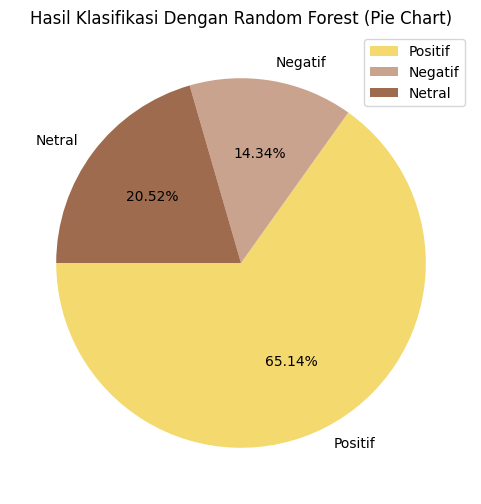

In [ ]:
#PIE CHART
#deklarasi variabel untuk menentukan label dan presentase
labelRF = ['Positif','Negatif','Netral']
presentaseRF = [pos_labelpierf, neg_labelpierf, net_labelpierf]
warnaRF=['#F4D96E', '#CAA38E','#9E6B4E']

# Membuat pie chart
plt.figure(figsize=(6, 6))
plt.title('Hasil Klasifikasi Dengan Random Forest (Pie Chart)')
plt.pie(presentaseRF, labels=labelRF,colors=warnaRF, autopct='%.2f%%', startangle=180)
plt.legend()

# Menampilkan pie chart
plt.show()

Text(0.5, 1.0, 'Hasil Confusion Matrix Dari Klasifikasi Dengan Random Forest (Heatmap)\n')

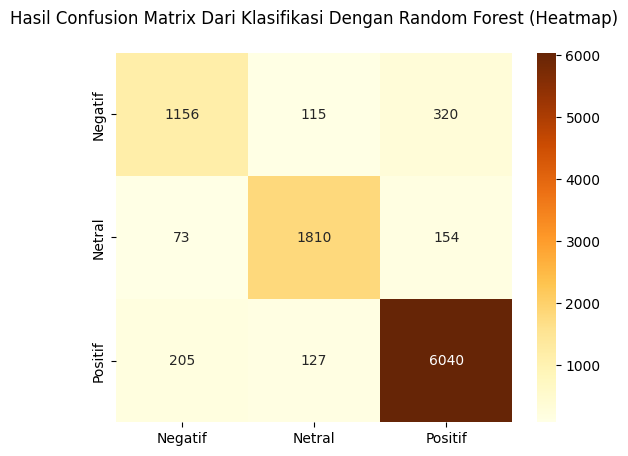

In [ ]:
#HEATMAP
sns.heatmap(confusionRF, annot=True, cmap='YlOrBr', fmt='d', xticklabels=['Negatif', 'Netral', 'Positif'],
            yticklabels=['Negatif', 'Netral', 'Positif'])
plt.title('Hasil Confusion Matrix Dari Klasifikasi Dengan Random Forest (Heatmap)\n')

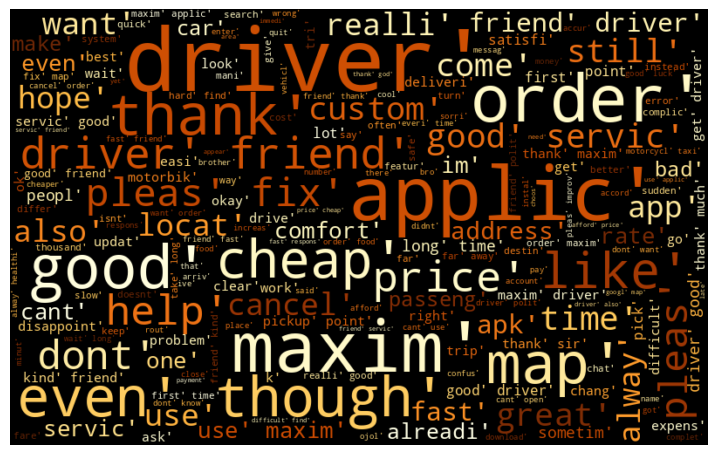

In [ ]:
#WORD CLOUD
# Membuat fungsi untuk menampilkan kata pada wordcloud
def wordcloud_rf(words):
    wordcloudRF = WordCloud(width=800, height=500, colormap="YlOrBr" ,background_color='black', random_state=42, max_font_size=100).generate(words)

    plt.figure(figsize=(9, 6))
    plt.imshow(wordcloudRF, interpolation='bilinear')
    plt.axis('off')


# Menampilkan wordcloud
all_wordsRF = ' '.join([text for text in predrf['content']])
wordcloud_rf(all_wordsRF)

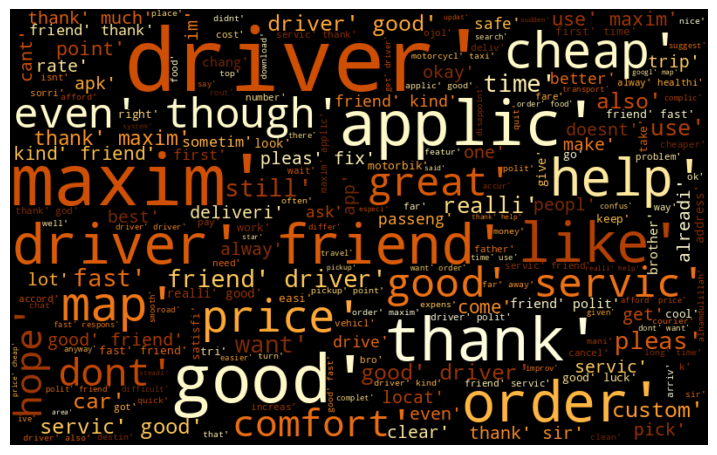

In [ ]:
#Wordcloud Sentiment positif
positif_wordsRF = ' '.join(text for text in predrf['content'][predrf['sentiment'] == 'positif'])
wordcloud_rf(positif_wordsRF)

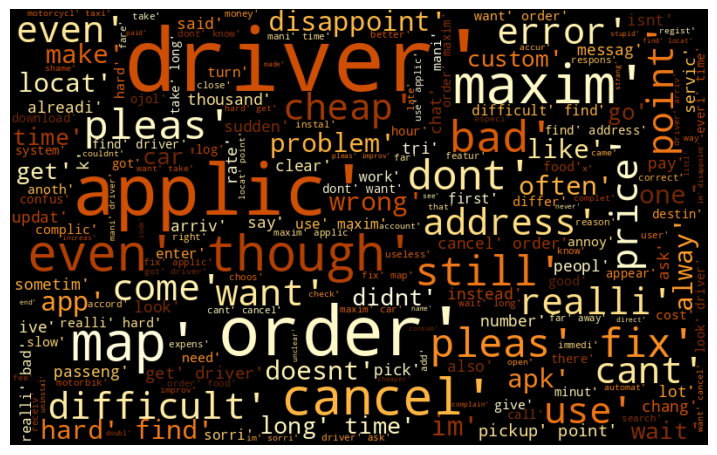

In [ ]:
#Wordcloud Sentiment negatif
negatif_wordsRF = ' '.join(text for text in predrf['content'][predrf['sentiment'] == 'negatif'])
wordcloud_rf(negatif_wordsRF)

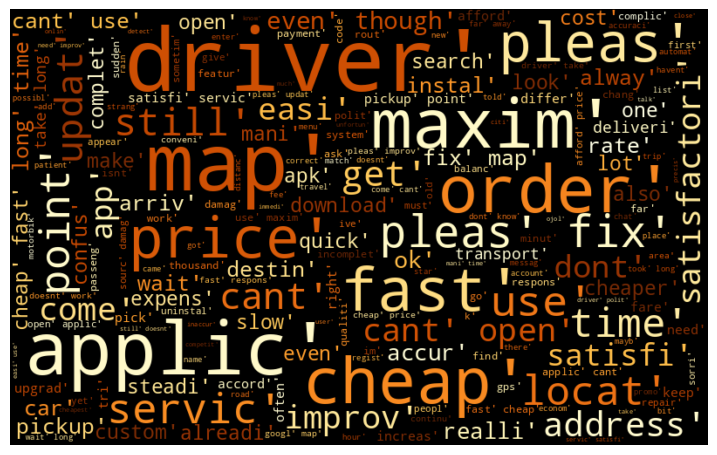

In [ ]:
#Wordcloud Sentiment netral
netral_wordsRF = ' '.join(text for text in predrf['content'][predrf['sentiment'] == 'netral'])
wordcloud_rf(netral_wordsRF)